# 「ガウス過程と機械学習」
# P.48 多変量ガウス分布からのサンプリング

In [1]:
using Distributions
using LinearAlgebra
using Plots

### 標準正規分布に従うサンプルを生成（Box-Muller法）

In [2]:
function gauss_sample(N, D)
    sample = zeros(D, N)
    for d in 1:D
        r₁ = rand(N)
        r₂ = rand(N)
        x = sqrt.(-2 .* log.(r₁)) .* sin.(2π .* r₂)
        μ = 0.0
        σ = 1.0
        sample[d, :] = μ .+ σ .* x
    end
    sample
end

gauss_sample (generic function with 1 method)

### 多変量サンプルを生成

In [3]:
function multi_gauss_sampler(N, D, Σ)
    X = gauss_sample(N, D)
    L = cholesky(Σ).L # Σをコレスキー分解し、下三角行列を .L で抽出（上三角行列の場合は .U）
    sample = L * X
end

multi_gauss_sampler (generic function with 1 method)

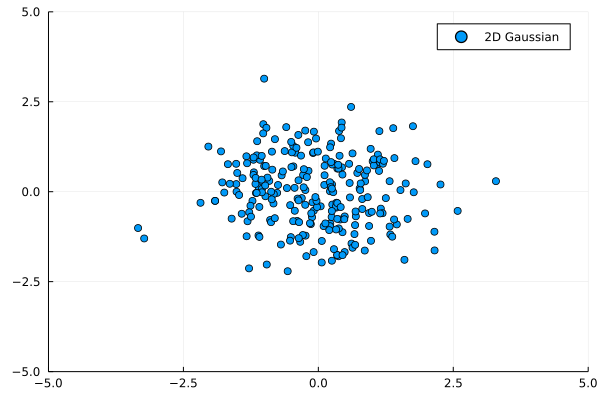

In [4]:
Σ = [
    1.0 0.0
    0.0 1.0
]

data = multi_gauss_sampler(250, 2, Σ)

scatter(data[1, :], data[2, :], xlim=(-5, 5), ylim=(-5, 5), label="2D Gaussian")